# <center>Barclays interview homework</center>

### Import packages

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, HTML
from matplotlib.ticker import FuncFormatter
from ipywidgets import widgets

### Load the data files 
**position_details.xlsx** - contains info about each position, multiple times if it has different instruments and info about matrics (DELTA + GAMMA)

In [162]:
position_df = pd.ExcelFile("position_details.xlsx").parse()
position_df

,Position_Id,Instrument_Id,Quantity,DELTA,GAMMA,Region
0,100712,4083077,-3608,9087.80,473.03,Asia & Pacific
1,100712,8501345,-789,-136515.50,525.92,Asia & Pacific
2,103203,5413901,-7655,-58967.53,55.17,Asia & Pacific
3,103412,4571038,3651,-72346.62,804.45,Asia & Pacific
4,103412,8404942,5707,-175468.55,3409.66,Asia & Pacific
...,...,...,...,...,...,...
248,979649,8501345,-6934,-49001.36,1605.43,Americas
249,980634,9490517,-7963,-83159.29,1899.58,Americas
250,982059,8404942,117,-71318.79,905.67,Asia & Pacific
251,995883,9490517,-2659,-98857.75,531.85,Asia & Pacific


**instrument_details.json** - contains a dictionary, with *Instrument_Id* as key and instrument info as values.

In [163]:
instrument_df = pd.read_json("instrument_details.json", orient='index') \
    .reset_index() \
    .rename(columns={"index": "Instrument_Id"})
instrument_df

,Instrument_Id,Country,Sector,Type
0,1105669,HK,Utilities,ETF
1,2001829,US,Services,Option
2,2499258,UK,Technology,Option
3,3558193,UK,Finance,Option
4,4083077,US,Technology,Stock
5,4520069,HK,Technology,ETF
6,4571038,VN,Finance,Option
7,5413901,US,Services,Option
8,7028001,CI,Services,ETF
9,8351692,UK,Services,Option


**PnL.xlsx** - contains PnL metric (profit & loss) for each position (through *Position_Id*), which is a matrix calculated for both *PriceChange* and *VolatilityChange*

In [164]:
pnl_df = pd.ExcelFile("PnL.xlsx").parse()
pnl_df

,Position_Id,PriceChange,VolatilityChange,PnL
0,670714,-25,-25,-59550
1,670714,-25,-10,-66555
2,670714,-25,-5,-68890
3,670714,-25,0,-71225
4,670714,-25,5,-73560
...,...,...,...,...
9746,361295,25,-5,-190985
9747,361295,25,0,-188375
9748,361295,25,5,-185765
9749,361295,25,10,-183155


### Merge instrument and position details to a single dataframe


In [165]:
merged_df = pd.merge(position_df, instrument_df, on=['Instrument_Id']).sort_values('Position_Id')
merged_df

,Position_Id,Instrument_Id,Quantity,DELTA,GAMMA,Region,Country,Sector,Type
0,100712,4083077,-3608,9087.80,473.03,Asia & Pacific,US,Technology,Stock
21,100712,8501345,-789,-136515.50,525.92,Asia & Pacific,SA,Technology,ETF
42,103203,5413901,-7655,-58967.53,55.17,Asia & Pacific,US,Services,Option
65,103412,4571038,3651,-72346.62,804.45,Asia & Pacific,VN,Finance,Option
85,103412,8404942,5707,-175468.55,3409.66,Asia & Pacific,UK,Utilities,Stock
...,...,...,...,...,...,...,...,...,...
41,979649,8501345,-6934,-49001.36,1605.43,Americas,SA,Technology,ETF
151,980634,9490517,-7963,-83159.29,1899.58,Americas,UK,Finance,ETF
106,982059,8404942,117,-71318.79,905.67,Asia & Pacific,UK,Utilities,Stock
152,995883,9490517,-2659,-98857.75,531.85,Asia & Pacific,UK,Finance,ETF


### Define table styles

In [177]:
th_props = [
  ('font-size', '18px'),
  ('text-align', 'center'),
  ('font-weight', 'bold'),
]
td_props = [
  ('font-size', '14px'),
  ('text-align', 'center'),
  ('width','15%')
]

styles = [
    dict(selector="th", props=th_props),
    dict(selector="td", props=td_props),
]

def style_negative(v, props=''):
    return props if v < 0 else None

def millions(x, pos):
    """ Format the values to milions """
    return '%1.1fM' % (x * 1e-6)

### <center>TASK 1: Create a table that shows the position and their DELTA and GAMMA</center>

In [167]:
"""
- Dislay the Position_Id, DELTA, and GAMMA of 'position_df' DataFrame
- Set CSS styles for the table
- Hide index column
- Set the floating point precision to 2
- NAN values are ignored
- Thousands are separated by comma
- Permanently display column headers in a scrolling frame
- Negative values are red
"""
result = position_df[["Position_Id", "DELTA", "GAMMA"]] \
    .style.set_table_styles(styles) \
    .hide(axis="index") \
    .format(precision=2, na_rep='', thousands=",", subset=['DELTA', 'GAMMA']) \
    .set_sticky(axis="columns") \
    .applymap(style_negative, props='color:red;') \

# render to HTML and display the result
display(
    HTML(
        result.to_html()
    )
)

Position_Id,DELTA,GAMMA
100712,"9,087.80",473.03
100712,"-136,515.50",525.92
103203,"-58,967.53",55.17
103412,"-72,346.62",804.45
103412,"-175,468.55","3,409.66"
103412,"-175,194.85","5,177.15"
107639,"-93,179.30","1,221.75"
121119,"60,255.59","1,231.72"
123455,"-59,879.35","1,598.52"
125461,"10,411.73","1,468.03"


### <center>TASK 2: Create a table that shows DELTA by each sector</center>

In [168]:
# sum all the DELTA values per each sector
resulted_df = pd.DataFrame(
    merged_df.groupby('Sector')['DELTA'].sum().reset_index()
)


# style the resulted table
resulted_df = resulted_df.sort_values('Sector') \
    .style.set_table_styles(styles) \
    .hide(axis="index") \
    .format(precision=2, na_rep='', thousands=",", subset=['DELTA']) \
    .applymap(style_negative, props='color:red;', subset=['DELTA'])

# display the result
display(
    HTML(
        resulted_df.to_html(index=False)
    )
)

Sector,DELTA
Energy,"-767,633.73"
Finance,"-2,487,872.12"
Services,"-2,321,026.19"
Technology,"-2,743,814.81"
Utilities,"-1,664,207.60"


### <center>TASK 3: Create a table from Task \#1, but allow the user to filter on instrument *Type*</center>

In [169]:
def handle_submit(sender):
    """
    Apply the filter and display the resulted table
    """
    # apply the filter
    filtered_values = merged_df.loc[merged_df['Type'] == combobox.value]
    
    # style the resulted table
    result = filtered_values[["Position_Id", "DELTA", "GAMMA", "Type"]] \
        .style.set_table_styles(styles) \
        .hide(axis="index") \
        .format(precision=2, na_rep='', thousands=",", subset=['DELTA', 'GAMMA']) \
        .set_sticky(axis="columns") \
        .applymap(style_negative, props='color:red;', subset=['DELTA', 'GAMMA']) \
    
    # render HTML table and display
    display(HTML(result.to_html()))
    

# get all the possible instrument types
possible_types = tuple(merged_df["Type"].unique())

# Display the input box
combobox = widgets.Combobox(
    placeholder='Enter Type',
    options=possible_types,
    continuous_update=False,
    ensure_option=True
)
display(combobox)
# combobox.close()
combobox.observe(handle_submit, 'value')

Combobox(value='', continuous_update=False, ensure_option=True, options=('Stock', 'ETF', 'Option'), placeholde…

### <center>TASK 4: Create a table showing top 10 positions contributing to risk (DELTA column, both the most positive and most negative)</center>

In [170]:
# find the indexes of 10 largest absolute values of DELTA column
ten_highest = position_df["DELTA"].abs().nlargest(n=10)

# find the desired rows by indexes
ten_highest = position_df.loc[ten_highest.index]

# reindex the table to range <1,10>
ten_highest.index = np.arange(1, len(ten_highest) + 1)

# style the resulted table
ten_highest = ten_highest \
    .style.set_table_styles(styles) \
    .format(precision=2, na_rep='', thousands=",", subset=['DELTA', 'GAMMA']) \
    .set_sticky(axis="columns") \
    .applymap(style_negative, props='color:red;', subset=['DELTA', 'GAMMA']) \

# render HTML table and display
display(HTML(ten_highest.to_html()))

,Position_Id,Instrument_Id,Quantity,DELTA,GAMMA,Region
1,367929,8501345,2138,"-199,705.19",520.80,Europe
2,779458,8351692,-6825,"-198,517.47",520.42,Americas
3,163009,8404942,-2243,"-195,577.24","8,531.08",Asia & Pacific
4,594318,2499258,9870,"-193,419.71","2,109.22",Europe
5,530612,1105669,-9033,"-192,631.21","8,266.17",Europe
6,646173,2499258,-2519,"-192,159.55","1,824.71",Asia & Pacific
7,201312,4571038,-2027,"-186,668.56",359.85,Europe
8,935232,7028001,-5420,"-184,756.25","3,704.90",Europe
9,337565,2001829,9280,"-182,405.84",537.93,Asia & Pacific
10,759697,3558193,8130,"-182,100.21","7,468.09",Europe


### <center>TASK 5+6: Create a table allowing user to specify *PriceChange* and *VolatilityChange* filter and show the total PnL per each region. Create a chart for the table</center>

Combobox(value='', continuous_update=False, description='PriceChange', ensure_option=True, options=('-25', '-1…

Combobox(value='', continuous_update=False, description='VolatilityChange', ensure_option=True, options=('-25'…

Button(description='Filter', style=ButtonStyle())

Region,PnL
Americas,"1,008,950"
Asia & Pacific,"235,550"
Europe,"-464,275"


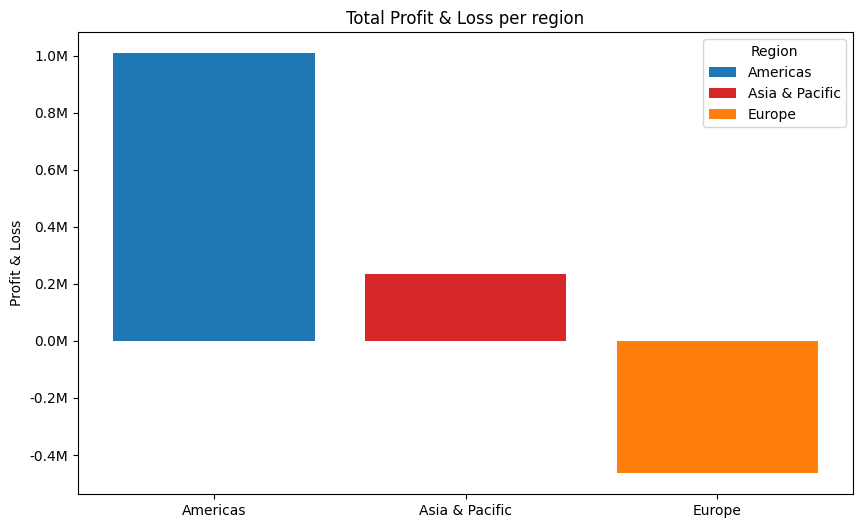

In [180]:
def handle_submit(sender):
    """
    Apply the filter and display the resulted table
    """
    priceChange = comb_price.value
    volatilityChange = comb_volat.value
    # apply the filter
    if not comb_price.value or not comb_volat.value:
        return
    
    # apply the filter of PriceChange and VolatilityChange
    result = pnl_df.loc[
        (pnl_df["PriceChange"] == int(priceChange)) & (pnl_df["VolatilityChange"] == int(volatilityChange))
    ]

    # get all the possible regions
    unique_regions = merged_df["Region"].unique()

    # merge the filtered PnL table with position table  
    result = pd.merge(merged_df, result, on=['Position_Id']).sort_values('Position_Id')

    result_df = pd.DataFrame(
        result.groupby('Region')['PnL'].sum().reset_index()
    ).sort_values('Region')
    
    # style the resulted table
    result = result_df \
        .style.set_table_styles(styles) \
        .hide(axis="index") \
        .format(precision=2, na_rep='', thousands=",", subset=['PnL']) \
        .set_sticky(axis="columns") \
        .applymap(style_negative, props='color:red;', subset=['PnL']) \
    
    # render HTML table and display
    display(HTML(result.to_html()))
    
    """ create a chart """
    # define the format of the milion values
    formatter = FuncFormatter(millions)

    # get the list of Regions and list of its PnL
    regions = [result_df.at[0, 'Region'], result_df.at[1, 'Region'], result_df.at[2, 'Region']]
    counts = [result_df.at[0, 'PnL'], result_df.at[1, 'PnL'], result_df.at[2, 'PnL']]

    # Create a chart
    fig, ax = plt.subplots(figsize=(10, 6))

    # fill the chart with values
    bar_labels = regions
    bar_colors = ['tab:blue', 'tab:red', 'tab:orange']
    ax.bar(regions, counts, label=bar_labels, color=bar_colors)

    # set labels
    ax.set_ylabel('Profit & Loss')
    ax.set_title('Total Profit & Loss per region')
    ax.legend(title='Region')

    # format the values
    ax.yaxis.set_major_formatter(formatter)

    # display the chart
    plt.show()

    
# get all the possible PriceChange and VolatilityChange values
possible_types_price = tuple(str(i) for i in pnl_df["PriceChange"].unique())
possible_types_volatility = tuple(str(i) for i in pnl_df["VolatilityChange"].unique())

# Display input boxes
comb_price = widgets.Combobox(
    description='PriceChange',
    options=possible_types_price,
    continuous_update=False,
    ensure_option=True
)
comb_volat = widgets.Combobox(
    description='VolatilityChange',
    options=possible_types_volatility,
    continuous_update=False,
    ensure_option=True
)
button = widgets.Button(
    description="Filter",
)
display(comb_price, comb_volat, button)

# on a button click, apply the filter and display the result
button.on_click(handle_submit)